Load necessary libraries.

In [14]:
## Basics
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

## ML Packages
import umap
from sklearn.preprocessing import StandardScaler, LabelEncoder
from scipy.spatial.distance import pdist, squareform
from sklearn.manifold import SpectralEmbedding, TSNE, MDS
from sklearn.decomposition import PCA, NMF, FastICA, TruncatedSVD
from sklearn.metrics import pairwise_distances

## Msc
from adjustText import adjust_text
from itertools import combinations

Load dataset.

In [19]:
df = pd.read_csv('00_authors.csv').rename(columns = {'Unnamed: 0': 'Author'}).drop(columns = 'BookID')
X = df.copy().drop(['Author'], axis=1)
authors = df["Author"].values

X_words = X.T.values
feature_names = X.columns

# Comparison

## Observations

/opt/anaconda3/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


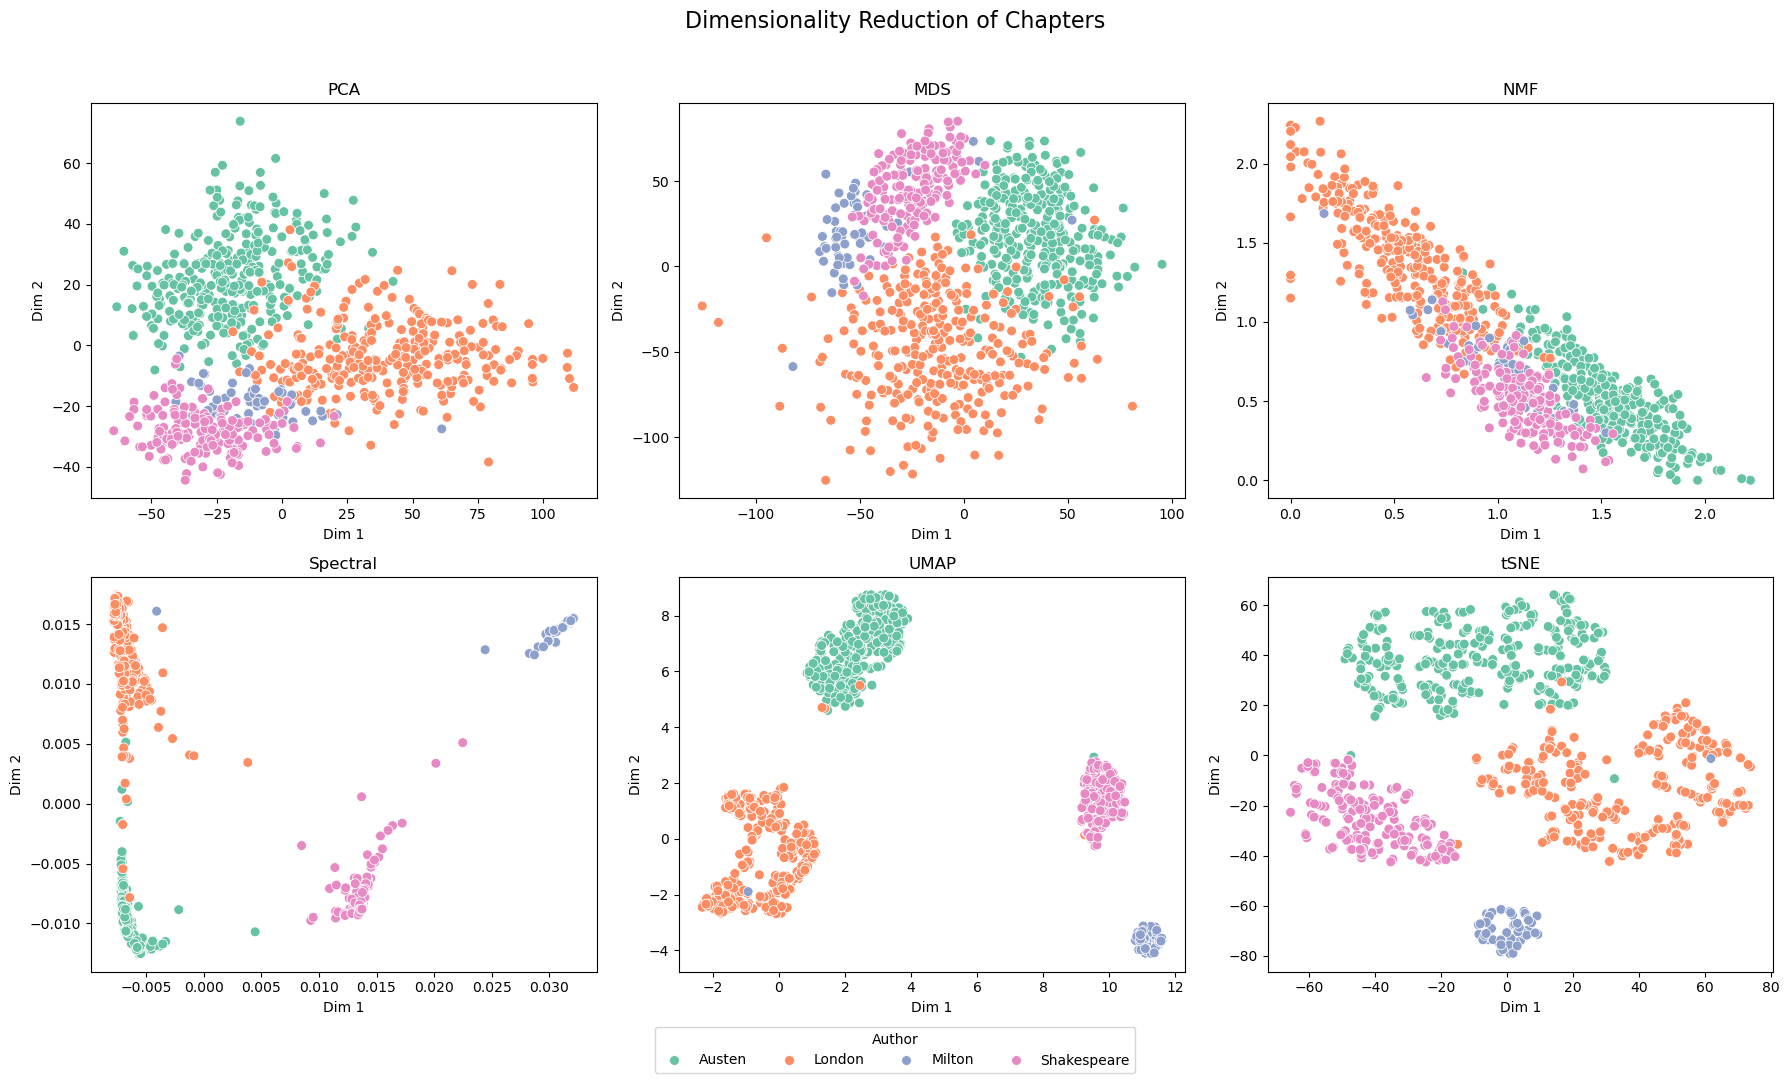

In [12]:
methods = {
    "PCA": PCA(n_components=2),
    "MDS": MDS(n_components=2, random_state=42),
    "NMF": NMF(n_components=2, random_state=42, max_iter=1000),
    "Spectral": SpectralEmbedding(n_components=2, affinity="nearest_neighbors", n_neighbors=10, random_state=42),
    "UMAP": umap.UMAP(n_components=2, random_state=42),
    "tSNE": TSNE(n_components=2, perplexity=5, learning_rate='auto', random_state=42)
}

palette = { "Austen": "#66c2a5", "London": "#fc8d62", "Milton": "#8da0cb", "Shakespeare": "#e78ac3"} # Set consistent colors for each label

embeddings = {name: model.fit_transform(X) for name, model in methods.items()}

fig, axs = plt.subplots(2, int(len(embeddings)/2), figsize=(len(methods)*3, 10))

for ax, (name, embed) in zip(axs.flatten(), embeddings.items()):
    sns.scatterplot(x=embed[:, 0], y=embed[:, 1], hue=authors, palette=palette, s=50, ax=ax)
    ax.set_title(name)
    ax.set_xlabel("Dim 1")
    ax.set_ylabel("Dim 2")
    ax.legend().remove()

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, title="Author", loc='lower center', ncol=4, bbox_to_anchor=(0.5, -0.05))
fig.suptitle("Dimensionality Reduction of Chapters", fontsize=16, y=1.02)

plt.tight_layout()
plt.savefig('Media/viz/02/02_across_methods_obs_viz')
plt.show()

## Features

/opt/anaconda3/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


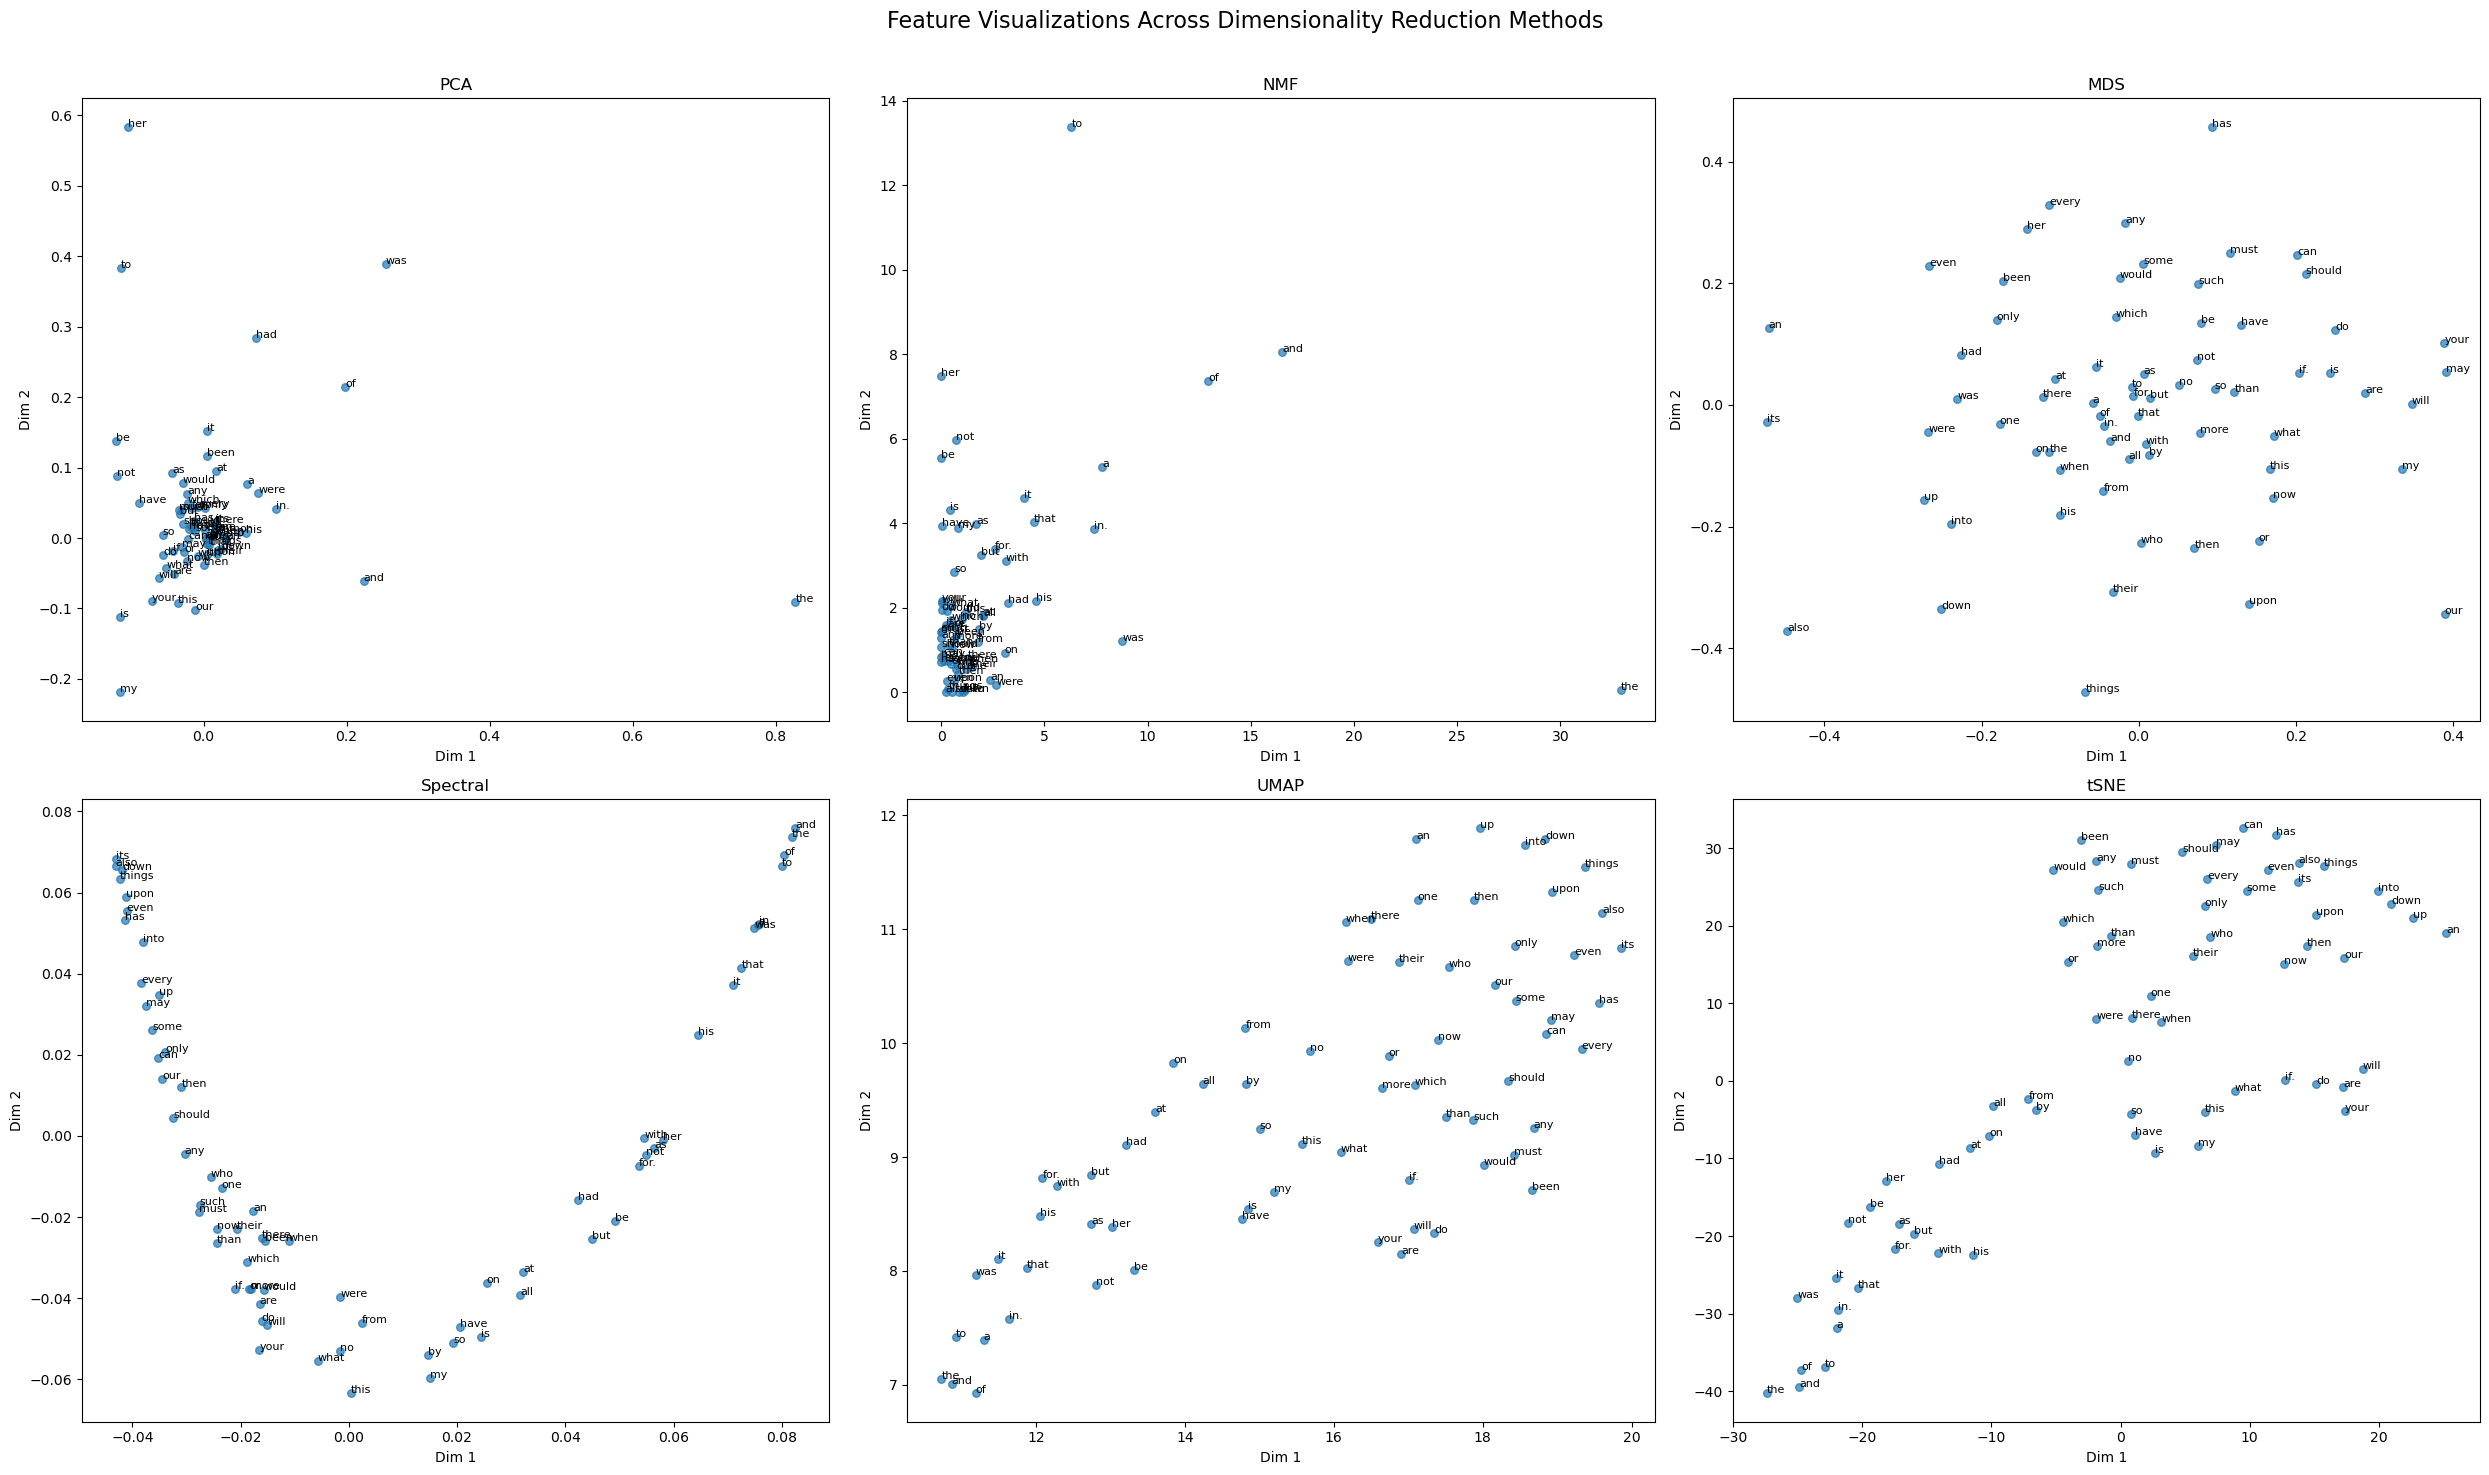

In [20]:
methods = {
    "PCA": PCA(n_components=2).fit(X),
    "NMF": NMF(n_components=2, init='random', random_state=42, max_iter=1000).fit(X),
    "MDS": MDS(n_components=2, dissimilarity='precomputed', random_state=42),
    "Spectral": SpectralEmbedding(n_components=2, affinity='nearest_neighbors', n_neighbors=10, random_state=42),
    "UMAP": umap.UMAP(n_components=2, n_neighbors=10, min_dist=0.3, random_state=42),
    "tSNE": TSNE(n_components=2, perplexity=5, learning_rate='auto', random_state=42)
}

feature_embeddings = {
    "PCA": methods["PCA"].components_.T,
    "NMF": methods["NMF"].components_.T,
    "MDS": methods["MDS"].fit_transform(pairwise_distances(X_words, metric="cosine")),
    "Spectral": methods["Spectral"].fit_transform(X_words),
    "UMAP": methods["UMAP"].fit_transform(X_words),
    "tSNE": methods["tSNE"].fit_transform(X_words)
}

fig, axs = plt.subplots(2, 3, figsize=(25, 15))
axs = axs.flatten()

for ax, (name, coords) in zip(axs, feature_embeddings.items()):
    ax.scatter(coords[:, 0], coords[:, 1], s=30, alpha=0.7)
    for i, word in enumerate(feature_names):
        ax.text(coords[i, 0], coords[i, 1], word, fontsize=8)
    ax.set_title(f"{name}")
    ax.set_xlabel("Dim 1")
    ax.set_ylabel("Dim 2")

plt.suptitle("Feature Visualizations Across Dimensionality Reduction Methods", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.savefig("Media/viz/02/01_feature_comparison_all_methods")
plt.show()